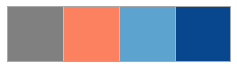

In [61]:
import random
from six.moves import cPickle as pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.patches import Circle
rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')
from PIL import Image
import numpy as np
from scipy.misc import comb
from math import log, exp, sqrt
from collections import Counter, OrderedDict
import numpy as np, scipy.stats as st
import seaborn as sns
sns.set_context("paper")
# sns.set_context('talk')
import string
import json
import pickle
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# COLORS = ["#808080", "#3498db", "#0000b3", "#ffd480", "#e74c3c"]
blues = sns.color_palette('Blues', 10)
reds = sns.color_palette('Reds')
COLORS = ["#808080", reds[2], blues[5], blues[9]]
sns.palplot(sns.color_palette(COLORS))

# from multiprocessing import set_start_method
# try:
#     set_start_method('spawn')
# except RuntimeError:
#     pass

## Abstract

In [ ]:
L = 800
x = np.arange(L)
y = np.zeros(L)
center = 300
a = 1e-5
y = 1/a * (1/np.pi * 1/(1+((x- center)/a)**2))
y /= np.sum(y)

if 0:
    centers = [center] + np.random.randint(low=1,
                                           high=L,
                                           size=10)
    sigmas = np.random.randint(low=1,
                               high=10,
                               size=10) / 10
    weights = [5] + np.random.randint(low=1,
                                      high=10,
                                      size=10)/2
    weights = weights / np.sum(weights)
    z = np.zeros(L)
    for w, c, s in zip(weights, centers, sigmas):
        z += w * np.exp(-(x-c)**2/2/s)
    # z += 1/30 * np.random.randn(50)
if 1:
    sigma = 10
    z = np.exp(-(x-center)**2/2/sigma**2)
z /= np.sum(z)
z = 13 * z
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('paper', font_scale=2.3, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
plt.figure(figsize=(6,5))
plt.plot(x, y, label='MLE')
plt.plot(x, z, label='Reward')
plt.xlim([center-12*sigma, center+12*sigma])
plt.xticks([])
plt.legend()
# plt.xticks(centers, ['jungle', 'forest', 'clearing'], rotation=45)

In [12]:
CI = pickle.load(open('../results/overall_ci.stats', 'rb'))

In [42]:
list(CI)

['fncnn6_reset_word_coco_tword009_idf10_a07_proj_embed_tied_init_free_showtell152',
 'fncnn6_reset_baseline_proj_Glove_coco_free_showtell152',
 'fncnn6_reset_baseline_showtell152',
 'fncnn6_reset_baseline_proj_embed_tied_Glove_coco_free_showtell152',
 'fncnn6_reset_baseline_proj_Glove_coco_frozen_showtell152',
 'fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_mode3_tsent05_a05_showtell152',
 'fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_mode2_tsent03_a05_showtell152',
 'fncnn6_reset_strat_rhamming_sim_pool1_tsent017_a04_showtell152',
 'fncnn6_reset_importance_qhamming_pool0_tsent01_rbleu4_mode0_tsent07_a05_showtell152',
 'fncnn6_reset_importance_qhamming_limited1_tsent017_rcider_tsent05_a04_topdown_v2',
 'fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_mode0_tsent03_a05_showtell152',
 'fncnn6_reset_strat_rhamming_sim_pool0_tsent01_a04_topdown',
 'fncnn6_reset_strat_rhamming_sim_pool0_tsent01_a04_showtell152',
 'fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_

In [6]:
b = CI['fncnn6_reset_baseline_showtell152']
cider = [ep['CIDEr'] for ep in b]

In [68]:
with open("../LISTMODELS", 'r') as f:
    allmodels = [l.strip() for l in f.readlines()]
print(allmodels)

['fncnn6_reset_baseline_GloveW_coco_free_showtell152', 'fncnn6_reset_baseline_GloveW_coco_frozen_showtell152', 'fncnn6_reset_baseline_proj_embed_tied_Glove_coco_free_showtell152', 'fncnn6_reset_baseline_proj_Glove_coco_free_showtell152', 'fncnn6_reset_baseline_proj_Glove_coco_frozen_showtell152', 'fncnn6_reset_baseline_showtell152', 'fncnn6_reset_combine_importance_qhamming_limited1_tsent017_rcider_tsent05_a04_word_coco_tword009_idf10_a03_topdown', 'fncnn6_reset_combine_importance_qhamming_limited1_tsent017_rcider_tsent05_a04_word_coco_tword009_idf10_a07_showtell152', 'fncnn6_reset_combine_importance_qhamming_limited2_tsent03_rcider_tsent05_a04_word_coco_tword009_idf10_a03_topdown', 'fncnn6_reset_combine_importance_qhamming_limited2_tsent03_rcider_tsent05_a05_word_coco_tword009_idf10_a07_showtell152', 'fncnn6_reset_combine_strat_rhamming_pool1_tsent017_a04_word_coco_tword009_idf10_a03_topdown', 'fncnn6_reset_combine_strat_rhamming_pool1_tsent017_a04_word_coco_tword009_idf10_a07_showtel

In [71]:
def isrequired(m, fltrs, exc=[]):
    for f in fltrs:
        if f not in m:
            return False
    for c in exc:
        if c in m:
            return False
    return True

models = [m for m in allmodels if isrequired(m, ['bleu', 'show'])]
# models = ['baseline_showtell152',
#           'topdown_resnet152_msc',
#           "word_coco_tword009_idf10_a07_showtell152",
#           'combine_strat_rhamming_pool2_tsent03_a05_word_coco_tword009_idf10_a07_showtell152']
# labels = ['Baseline Show\&Tell', "Baseline TopDown", "Tok Show\&Tell", 'Combine Show\&Tell']
sns.set()
sns.set_style('whitegrid', rc={"axes.edgecolor": 'darkgray'})
sns.set_context('paper', font_scale=2.3, rc={"lines.linewidth": 2,
                                             "lines.markersize": 8})
# fig, axes = plt.subplots(1, len(models), figsize=(2*len(models), 3), sharey=True)
for e, model in enumerate(models):
    cid = [100 * ep['CIDEr'] for ep in CI[model]][-8:]
    ci = st.t.interval(0.95, len(cid)-1, loc=np.mean(cid), scale=st.sem(cid))
    print(models[e], "ci width:", ci[1]-ci[0])
#     axes[e].boxplot(cid, notch=0, sym='+')
#     axes[e].set_xticklabels([labels[e]], fontsize=10)
# axes[0].set_yticks(np.linspace(90, 110, 6))
# axes[0].set_yticklabels(np.linspace(90, 110, 6), fontsize=10)

fncnn6_reset_importance_qhamming_pool0_tsent01_rbleu4_mode0_tsent07_a05_showtell152 ci width: 0.614025957108
fncnn6_reset_importance_qhamming_pool0_tsent01_rbleu4_mode3_tsent05_a04_showtell152 ci width: 0.518217382617
fncnn6_reset_importance_qhamming_pool0_tsent01_rbleu4_tsent05_a04_showtell152 ci width: 0.39075996309
fncnn6_reset_importance_qhamming_pool1_tsent017_rbleu4_mode0_tsent07_a04_showtell152 ci width: 0.63392729022
fncnn6_reset_importance_qhamming_pool1_tsent017_rbleu4_mode3_tsent05_a04_showtell152 ci width: 0.577358881031
fncnn6_reset_importance_qhamming_pool1_tsent017_rbleu4_tsent05_a04_showtell152 ci width: 0.721752239523
fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_mode0_tsent03_a05_showtell152 ci width: 0.767706312329
fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_mode0_tsent07_a05_showtell152 ci width: 0.904567865845
fncnn6_reset_importance_qhamming_pool2_tsent03_rbleu4_mode2_tsent03_a05_showtell152 ci width: 0.30402986565
fncnn6_reset_importance_qhammin